# Kashaf Naz 

Here I performed data analysis, **Use Case 2** Practice notebook for univariate analysis using **NHANES** data

Perform some univariate analyses using the data of **National Health and Nutrition Examination Survey (NHANES)**.

To get started, we will use the same module **imports** and read the data in the case study:

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [282]:
da = pd.read_csv("nhanes_2015_2016.csv")

# Perform some univariate analyses
using the data of **National Health and Nutrition Examination Survey (NHANES)**.

In [283]:
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


### Frequency tables

The [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable.  Below we show the frequency distribution of the [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2) variable, which is a variable that reflects a person's level of educational attainment.  The `value_counts` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts` is actually a Pandas data frame, so can be further processed using any Pandas methods for working with data frames.

The numbers 1, 2, 3, 4, 5, 9 seen below are integer codes for the 6 possible non-missing values of the DMDEDUC2 variable.  The meaning of these codes is given in the NHANES codebook located [here](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2), and will be discussed further below.  This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

# Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [284]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [285]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

Note that the `value_counts` method excludes missing values.  We confirm this below by adding up the number of observations with a DMDEDUC2 value equal to 1, 2, 3, 4, 5, or 9 (there are 5474 such rows), and comparing this to the total number of rows in the data set, which is 5735. This tells us that there are 5735 - 5474 = 261 missing values for this variable (other variables may have different numbers of missing values).

In [286]:
da["DMDMARTLV2"] = da.DMDMARTL.replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated",5:"Never_Married",
                                     6:"Living_With_Partner",77:"Refused",99:"Dont_Know"})

<AxesSubplot:>

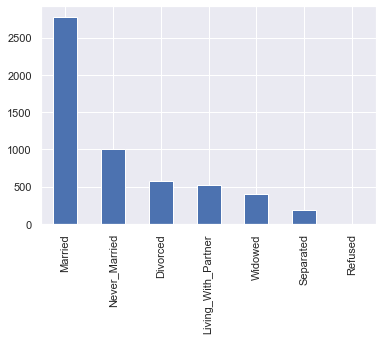

In [287]:
da.DMDMARTLV2.value_counts().plot(kind = 'bar')

In [288]:
da.shape

(5735, 30)

Another way to obtain this result is to locate all the null (missing) values in the data set using the [isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) Pandas function, and count the number of such locations.

In [289]:
pd.isnull(da.DMDMARTLV2).sum()

261

In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [290]:
da["DMDMARTLV2"] = da.DMDMARTL.replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated",5:"Never_Married",
                                     6:"Living_With_Partner",77:"Refused",99:"Dont_Know"})

da.DMDMARTLV2.value_counts()

Married                2780
Never_Married          1004
Divorced                579
Living_With_Partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLV2, dtype: int64

We will also want to have a relabeled version of the gender variable, so we will construct that now as well. We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.

In [291]:
da["RIAGENDRV2"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})


In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries. Below we create a new category called "Missing", and assign all missing values to it usig fillna. Then we recalculate the frequency distribution. We see that 4.6% of the responses are missing.

<AxesSubplot:>

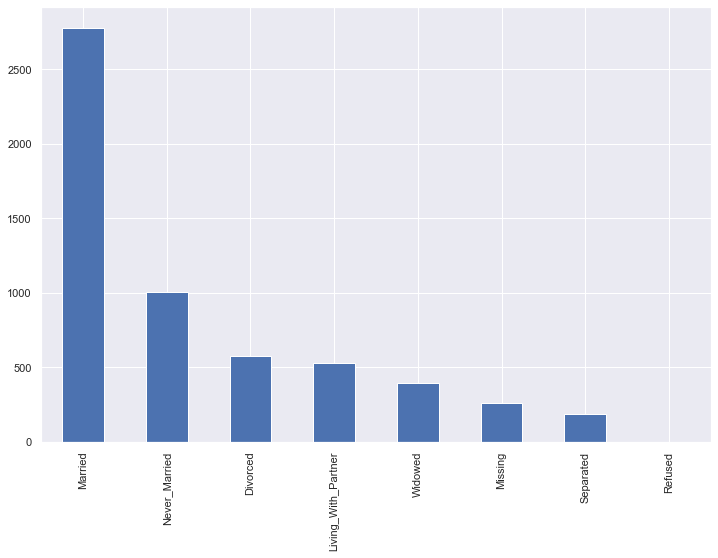

In [292]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(12, 8)}) 
da["DMDMARTLV2"] = da.DMDMARTLV2.fillna("Missing")
da.DMDMARTLV2.value_counts().plot(kind ='bar')

In [293]:
da.shape

(5735, 31)

<AxesSubplot:xlabel='RIAGENDRV2,DMDMARTLV2'>

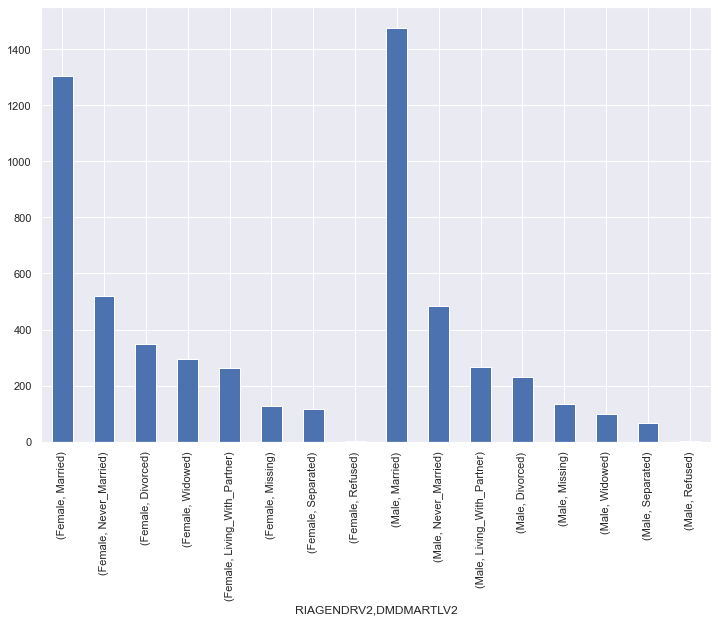

In [294]:
da.groupby("RIAGENDRV2")["DMDMARTLV2"].value_counts().plot(kind ='bar')


<AxesSubplot:xlabel='agegrp,DMDMARTLV2'>

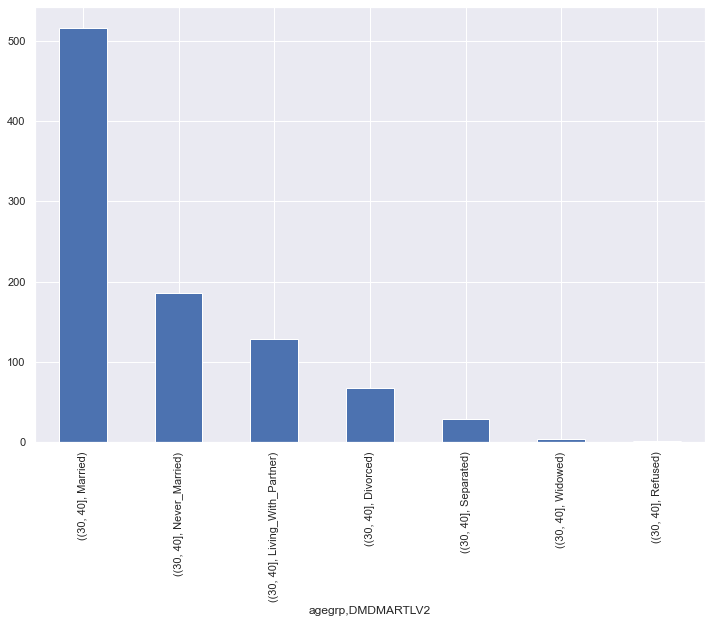

In [295]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("agegrp")["DMDMARTLV2"].value_counts().plot(kind ='bar')

In [296]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("agegrp")["RIAGENDRV2"].value_counts()

agegrp    RIAGENDRV2
(30, 40]  Female        474
          Male          458
Name: RIAGENDRV2, dtype: int64

<AxesSubplot:xlabel='agegrp,RIAGENDRV2'>

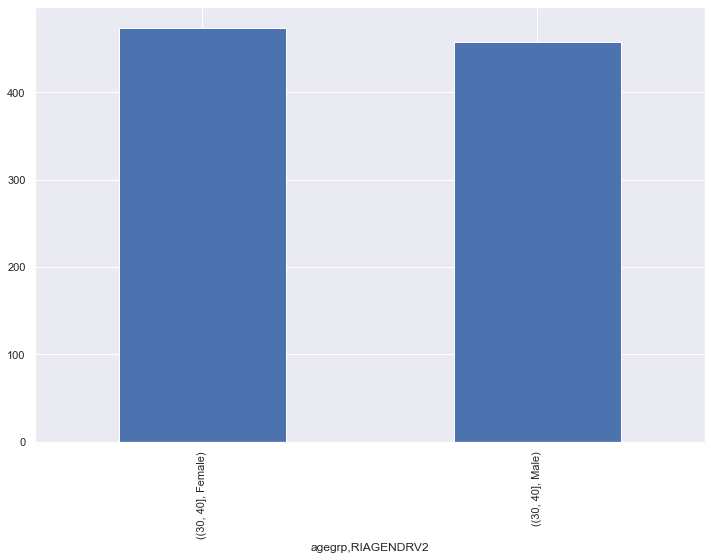

In [297]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("agegrp")["RIAGENDRV2"].value_counts().plot(kind ='bar')

In [298]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("agegrp")["RIAGENDRV2"].value_counts()

agegrp    RIAGENDRV2
(30, 40]  Female        474
          Male          458
Name: RIAGENDRV2, dtype: int64

In [299]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("RIAGENDRV2")["DMDMARTLV2"].value_counts()

RIAGENDRV2  DMDMARTLV2         
Female      Married                1303
            Never_Married           520
            Divorced                350
            Widowed                 296
            Living_With_Partner     262
            Missing                 126
            Separated               118
            Refused                   1
Male        Married                1477
            Never_Married           484
            Living_With_Partner     265
            Divorced                229
            Missing                 135
            Widowed                 100
            Separated                68
            Refused                   1
Name: DMDMARTLV2, dtype: int64

In [300]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby(["agegrp", "RIAGENDRV2"])["DMDMARTLV2"].value_counts()

agegrp    RIAGENDRV2  DMDMARTLV2         
(30, 40]  Female      Married                258
                      Never_Married           97
                      Living_With_Partner     57
                      Divorced                43
                      Separated               17
                      Widowed                  2
          Male        Married                258
                      Never_Married           89
                      Living_With_Partner     72
                      Divorced                24
                      Separated               12
                      Widowed                  2
                      Refused                  1
Name: DMDMARTLV2, dtype: int64

In [301]:
age_distinct = da[["agegrp","RIAGENDRV2","DMDMARTLV2"]].dropna()
da["agegrp"] = pd.cut(da.RIDAGEYR, [0, 18,20, 30, 40, 50, 60, 70, 80])
da.groupby(["agegrp", "RIAGENDRV2"])["DMDMARTLV2"].value_counts()


agegrp    RIAGENDRV2  DMDMARTLV2         
(0, 18]   Female      Missing                70
          Male        Missing                63
(18, 20]  Female      Missing                56
                      Never_Married          30
                      Living_With_Partner     8
                                             ..
(70, 80]  Male        Widowed                67
                      Divorced               57
                      Separated              14
                      Living_With_Partner     9
                      Never_Married           9
Name: DMDMARTLV2, Length: 83, dtype: int64

In [338]:
def answer_three():
        age_distinct = da[["agegrp","RIAGENDRV2","DMDMARTLV2"]].dropna()
        da["agegrp"] = pd.cut(da.RIDAGEYR, [0, 18,20, 30, 40, 50, 60, 70, 80])
        return da.groupby(["agegrp", "RIAGENDRV2"])["DMDMARTLV2"].value_counts().plot(kind ='bar',figsize = (25,8))


<AxesSubplot:xlabel='agegrp,RIAGENDRV2,DMDMARTLV2'>

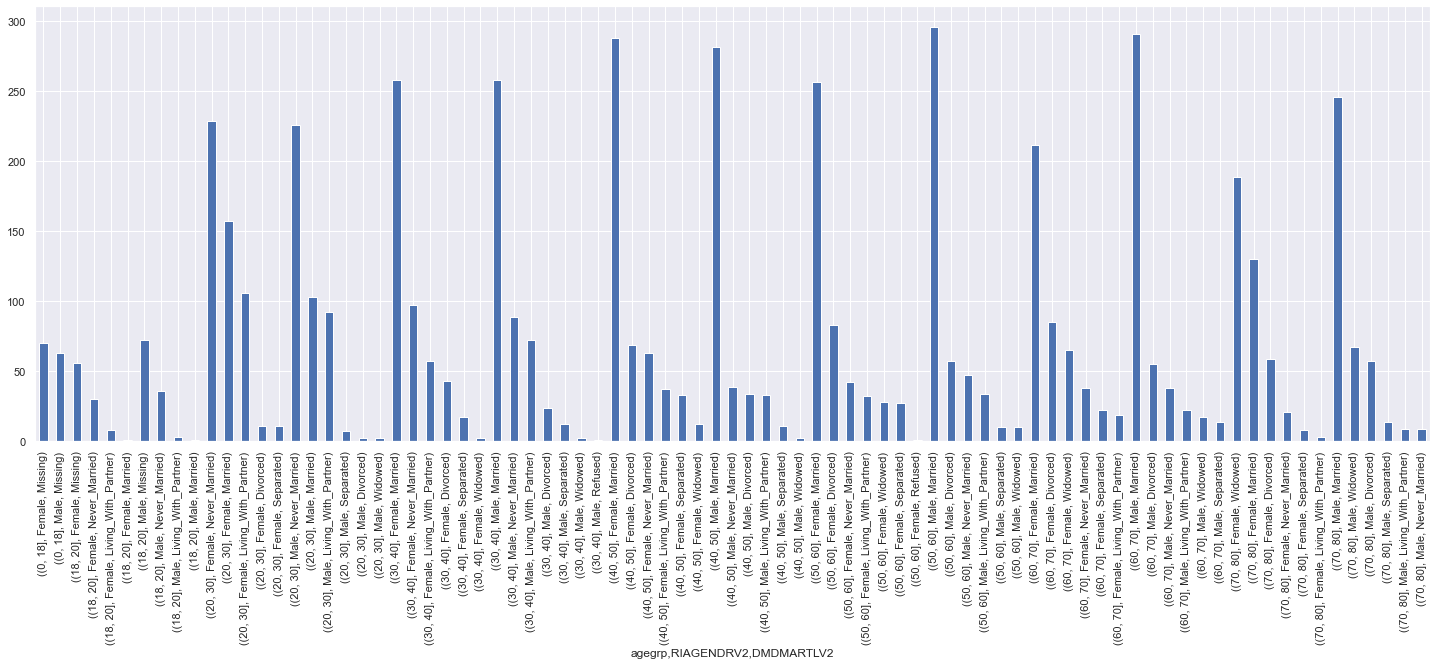

In [339]:
answer_three()

# Numerical summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the [describe](https://pandas.pydata.org/pandas-docs/stable/basics.html#summarizing-data-describe) data frame method.  Below we demonstrate how to do this using the body weight variable ([BMXWT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT)).  As with many surveys, some data values are missing, so we explicitly drop the missing cases using the [dropna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#dropping-axis-labels-with-missing-data-dropna) method before generating the summaries.

In [304]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

<AxesSubplot:xlabel='agegrp,RIAGENDRV2'>

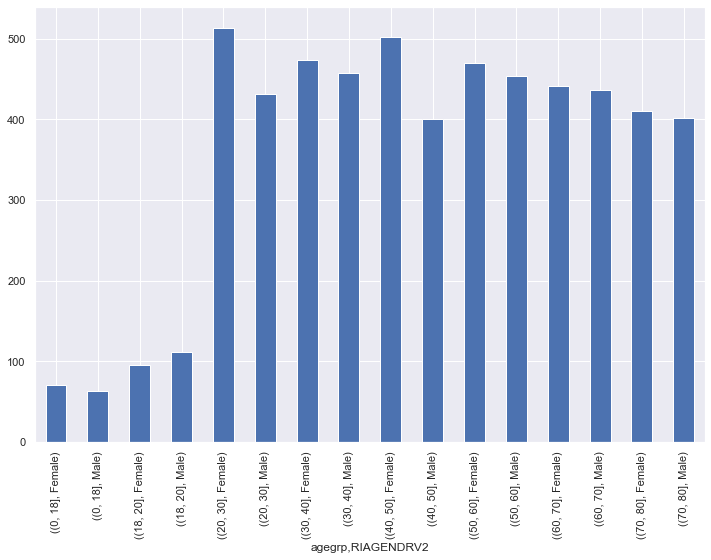

In [305]:
da.groupby(["agegrp", "RIAGENDRV2"])["DMDMARTLV2"].count().plot(kind= 'bar',figsize=(12,8))


It's also possible to calculate individual summary statistics from one column of a data set.  This can be done using Pandas methods functions:

In [306]:
da.BMXWT.dropna().mean() # Pandas method

81.34267560889509

# Question 3
Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

# se the bins argument to distplot to produce histograms 
with different numbers of bins. Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small.

In [307]:
da.groupby(['BMXHT']).count()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,agegrp,DMDMARTLV2,RIAGENDRV2,agegroup
BMXHT,,,,,,,,,,,,,,,,,,,,,
129.7,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
136.5,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
137.4,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
137.6,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
137.9,1,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195.4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
195.6,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
198.4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Quantitative variables
can be effectively summarized graphically. Below we see the distribution of body weight (in Kg), shown as a histogram. It is evidently right-skewed.

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


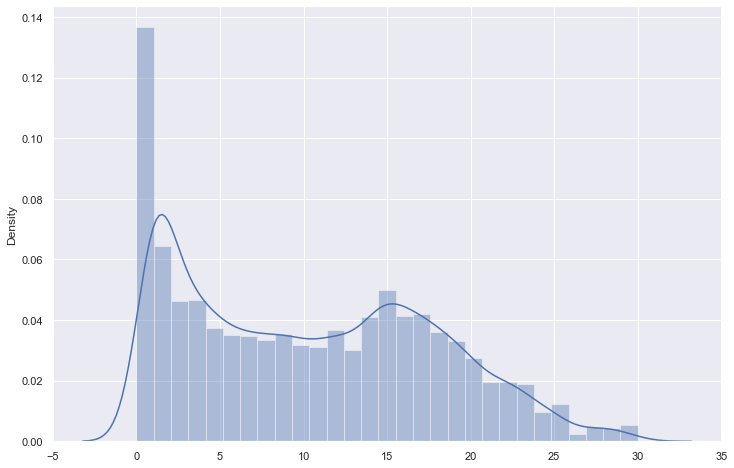

In [308]:


x = da.groupby(['BMXHT']).count()

ax = sns.distplot(x)

<AxesSubplot:xlabel='BMXHT', ylabel='RIAGENDRV2'>

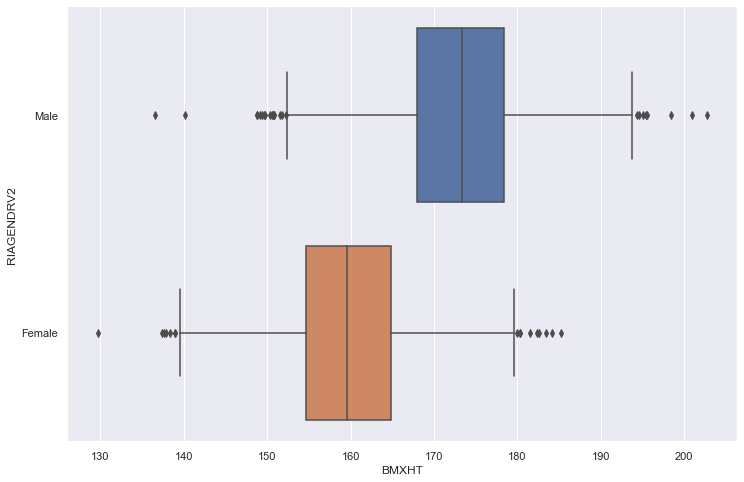

In [309]:


sns.boxplot(x = 'BMXHT', y = 'RIAGENDRV2' , data = da)

<AxesSubplot:xlabel='BMXHT', ylabel='RIAGENDRV2'>

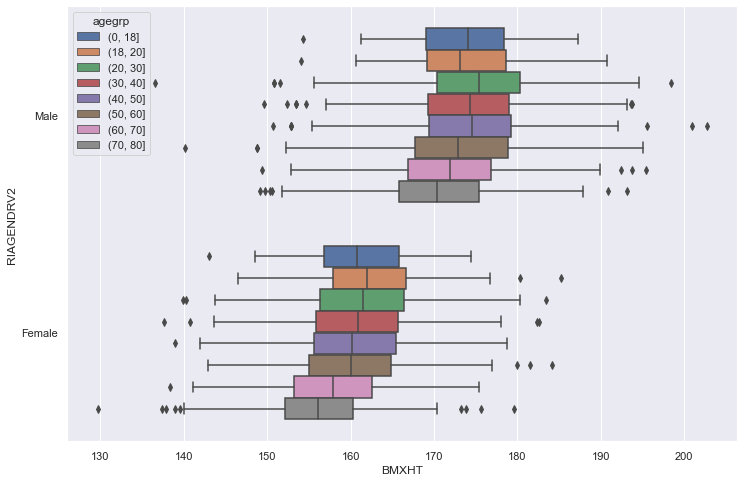

In [310]:
sns.boxplot(x = 'BMXHT', y = 'RIAGENDRV2' ,hue = 'agegrp', data = da)

# Graphical summaries

Quantitative variables can be effectively summarized graphically.  Below we see the distribution of body weight (in Kg), shown as a histogram.  It is evidently right-skewed.

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXWT', ylabel='Density'>

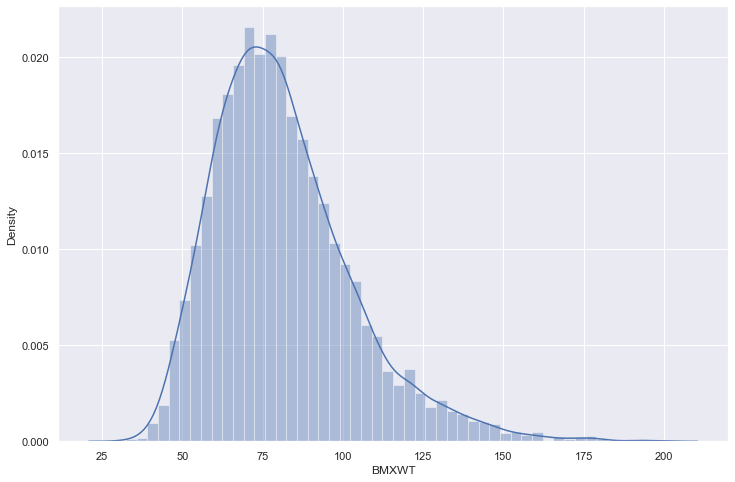

In [311]:
sns.distplot(da.BMXWT.dropna())

# Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPXSY1', ylabel='Density'>

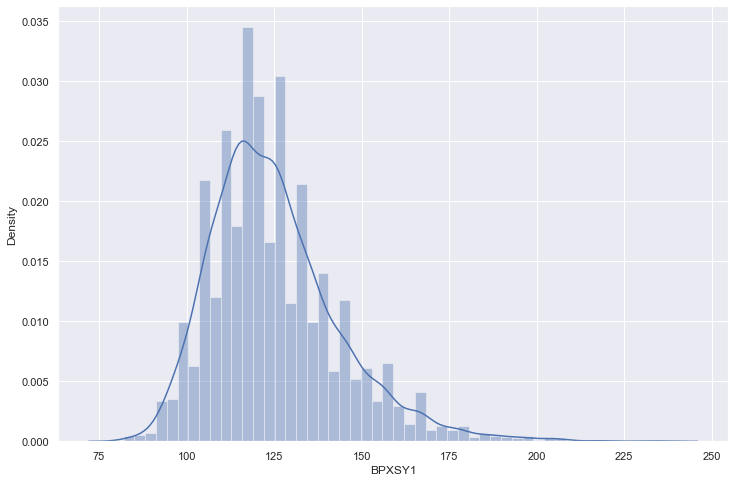

In [312]:
sns.distplot(da.BPXSY1.dropna())

Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

This stats tell us about 37% of population has 

In [314]:
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

diastolic blood pressure is between 80 and 89

In [315]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

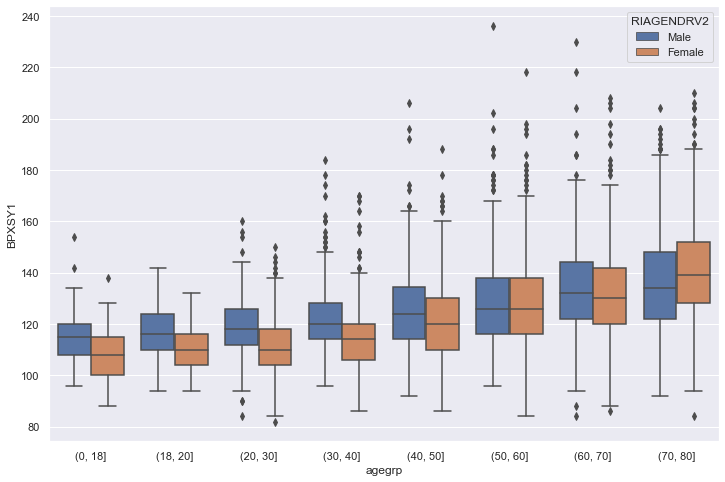

In [316]:
sns.boxplot(x = 'agegrp', y = 'BPXSY1' , hue = 'RIAGENDRV2', data = da)

Taking this a step further, it is also the case that blood pressure tends to differ between women and men.  While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure.  Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY2'>

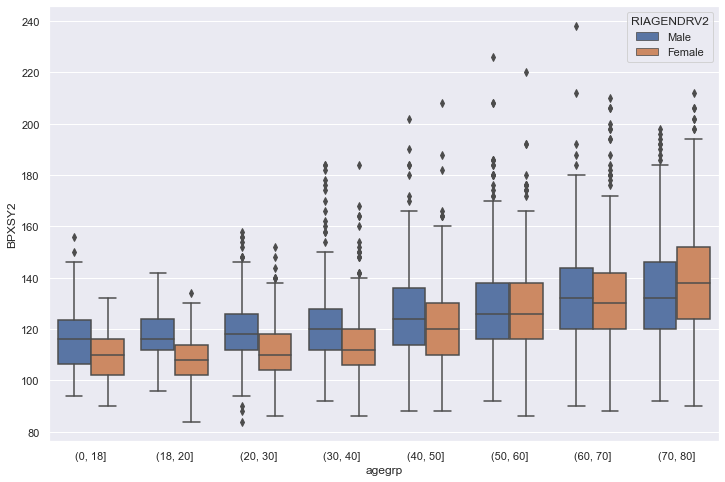

In [317]:
sns.boxplot(x = 'agegrp', y = 'BPXSY2' , hue = 'RIAGENDRV2', data = da)

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands.  Each approach highlights a different aspect of the data.

<AxesSubplot:xlabel='RIAGENDRV2', ylabel='BPXSY2'>

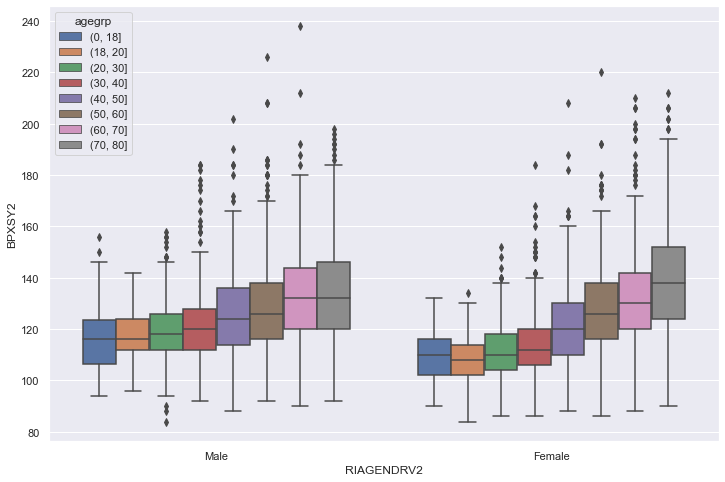

In [318]:
sns.boxplot(x = 'RIAGENDRV2', y = 'BPXSY2' , hue = 'agegrp', data = da)

Stratification can also be useful when working with categorical variables.  Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands.  While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates. 

**Note on causality and confounding:** An important role of statistics is to aid researchers in identifying causes underlying observed differences.  Here we have seen differences in both blood pressure and educational attainment based on age.  It is plausible that aging directly causes blood pressure to increase.  But in the case of educational attainment, this is actually a "birth cohort effect".  NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later.  Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past.  Therefore, younger people as a group have higher educational attainment than older people as a group.  As these young people grow older, the cross sectional relationship between age and educational attainment will change.

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY2'>

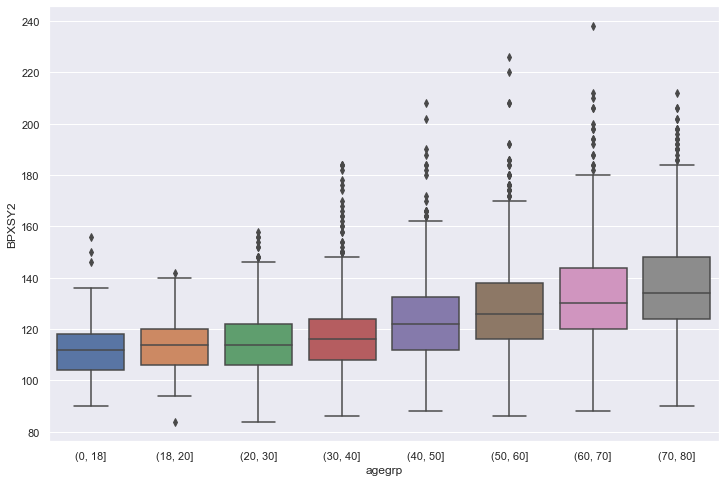

In [319]:
sns.boxplot(x = 'agegrp', y = 'BPXSY2' , data = da)

In [320]:
def answer_df():
    sns.set_theme(style="whitegrid")
    sns.set(rc={"figure.figsize":(25, 12)}) 
    return sns.pointplot(x = 'BPXSY1', y = 'BPXSY2' , hue = 'RIAGENDRV2', data = da)

<AxesSubplot:xlabel='BPXSY1', ylabel='BPXSY2'>

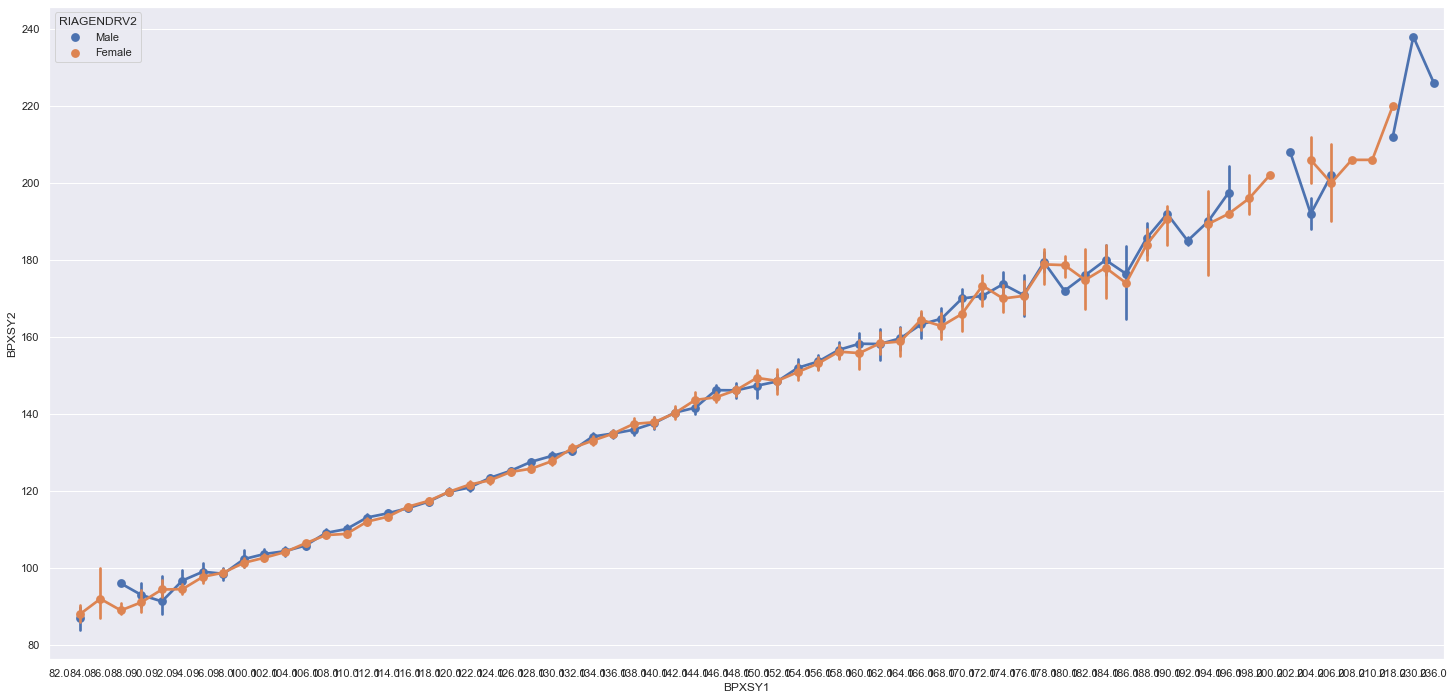

In [321]:
answer_df()

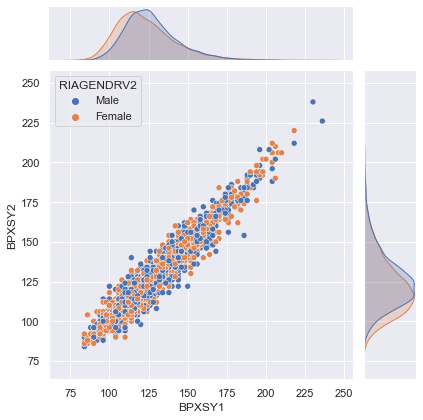

In [322]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(12, 8)}) 
sns.jointplot(x = 'BPXSY1', y = 'BPXSY2' , hue = 'RIAGENDRV2', data = da)

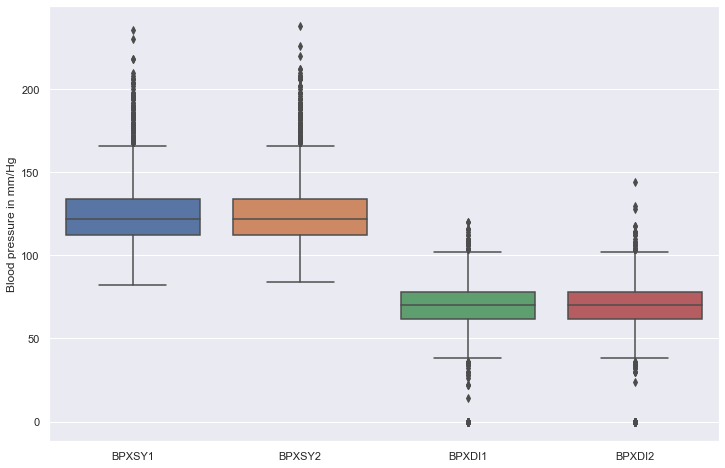

In [323]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

# Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age.  To see this trend in the NHANES data, we can [partition](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum.  Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data.  Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

# Question 5
Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is DMDEDUC2). Convert the frequencies to proportions.

In [324]:
da["DMDEDUC2"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

da.groupby("agegrp")["DMDEDUC2"].value_counts()

agegrp    DMDEDUC2       
(18, 20]  Some college/AA     43
          HS/GED              26
          9-11                 8
          <9                   1
          College              1
(20, 30]  Some college/AA    321
          College            277
          HS/GED             211
          9-11                91
          <9                  46
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11   

<AxesSubplot:xlabel='agegrp,RIAGENDRV2,DMDEDUC2'>

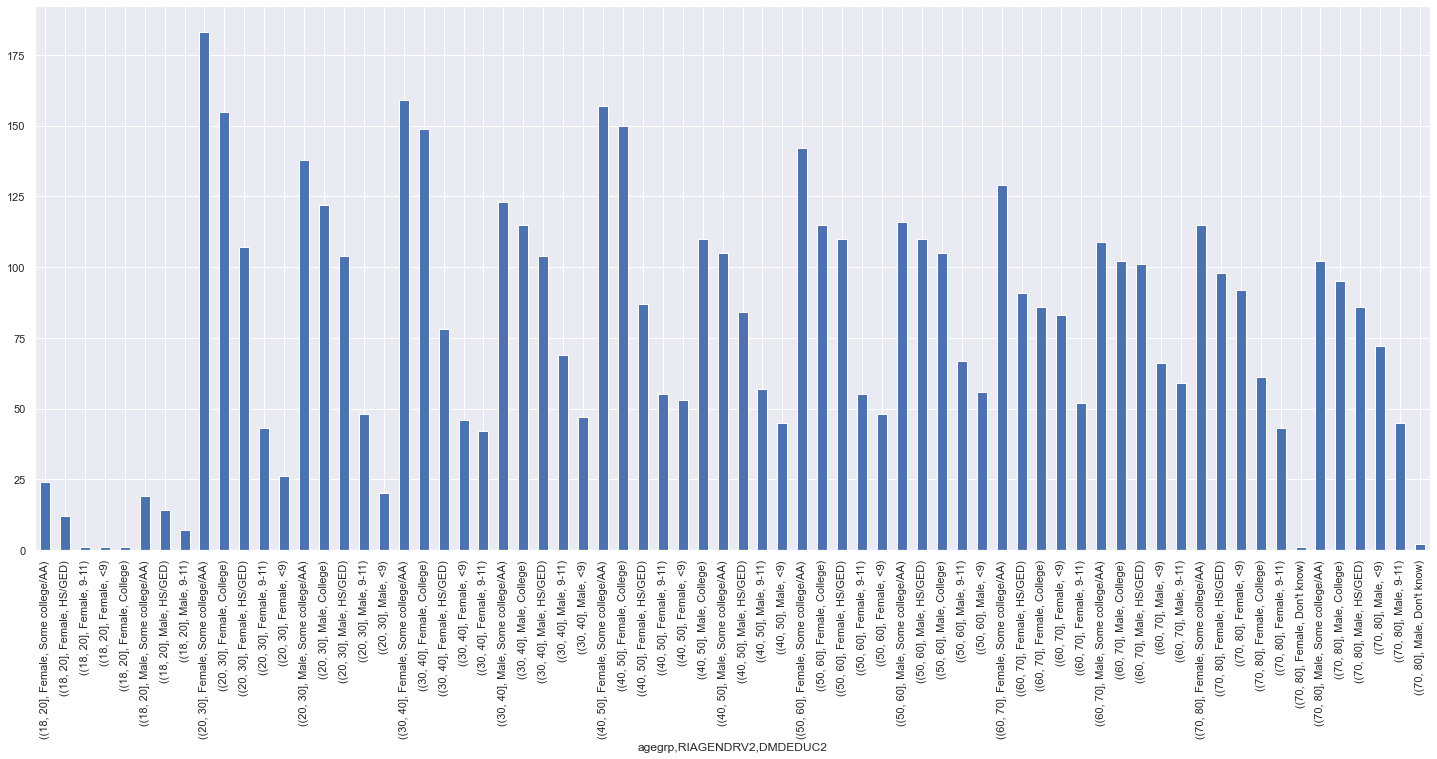

In [325]:
da.groupby(["agegrp", "RIAGENDRV2"])["DMDEDUC2"].value_counts().plot(kind= 'bar',figsize=(25,10))
# sns.barplot(x = 'agegrp', y = 'DMDEDUC2',hue = 'RIAGENDRV2', data = da)

In [326]:
def answer_five():
    da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])

    return da.groupby(["agegrp", "RIAGENDRV2"])["DMDEDUC2"].value_counts().plot(kind= 'bar',figsize=(12,7))


<AxesSubplot:xlabel='agegrp,RIAGENDRV2,DMDEDUC2'>

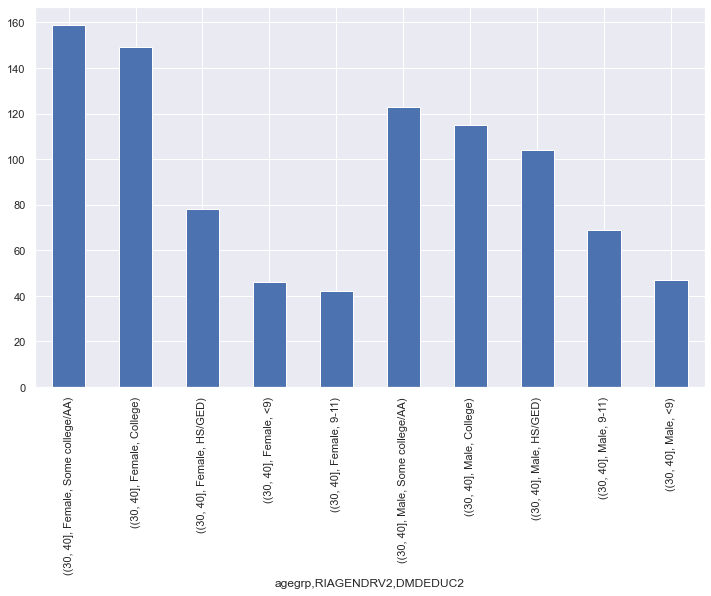

In [327]:
answer_five()

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously.  In doing this, it is easier to interpret the results if we [pivot](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) the education levels into the columns, and normalize the counts so that they sum to 1.  After doing this, the results can be interpreted as proportions or probabilities.  One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

# Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [329]:
b = da.BMXHT.dropna().mean()
b

166.14283447911131

In [330]:
c = da.BMXBMI.dropna().mean()
c

29.38219710349705

In [331]:
d = da.RIAGENDR.dropna().mean()
d

1.518918918918919

In [332]:
e = da.SDMVSTRA.dropna().mean()
e

126.23661726242372

In [333]:
f = da.SDMVPSU.dropna().mean()
f

1.4878814298169136

Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [366]:
from scipy.stats import iqr


RIDAGEYR_df = da.groupby(["SDMVSTRA", "SDMVPSU"])["RIDAGEYR"].mean()
iqr(RIDAGEYR_df)

5.939950636873597

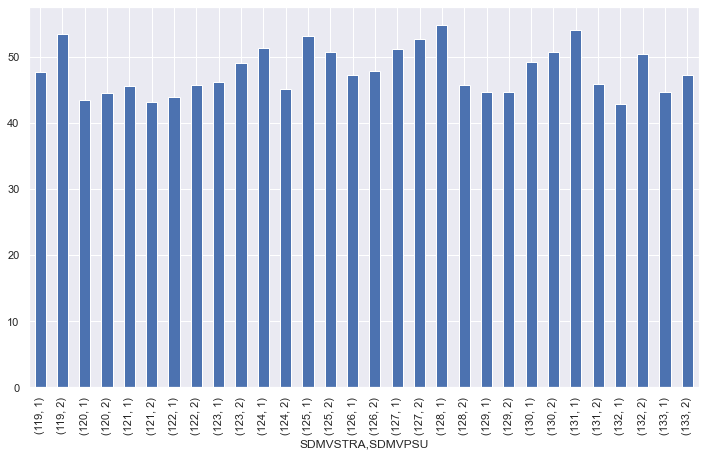

In [368]:
RIDAGEYR_df = da.groupby(["SDMVSTRA", "SDMVPSU"])["RIDAGEYR"].mean().plot(kind= 'bar',figsize=(12,7))

In [373]:
BMXHT_df = da.groupby(["SDMVSTRA", "SDMVPSU"])["BMXHT"].mean()
iqr(BMXHT_df)


2.5201168634500846

In [370]:
BMXBMI_df = da.groupby(["SDMVSTRA", "SDMVPSU"])["BMXBMI"].mean()
iqr(BMXBMI_df)

1.9174227823480763

In [371]:
RIAGENDR_df = da.groupby(["SDMVSTRA", "SDMVPSU"])["RIAGENDR"].mean()
iqr(RIAGENDR_df)

0.04658306200577389

# Conclusion

inter-quartile range (IQR) for age(RIDAGEYR) is the ratio between the largest and gender(RIAGENDR) smalles IQR across the MVUs.